<a href="https://colab.research.google.com/github/emrecicekyurt/TensorFlowTutorialProjects/blob/main/CNN_MultiClassClassificationwithTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultiClass Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust differen hyperparameters and improve the model
7. Repeat until satisfied

## 1. Import and become one with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip the data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-23 20:24:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.203.240, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.203.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   277MB/s    in 1.8s    

2022-06-23 20:24:26 (277 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os 

# Walk through 10 classes of image data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 10 directories and 0 images in 10_fo

In [3]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jun 23 20:24 .
drwxr-xr-x  1 root root 4096 Jun 23 20:24 ..
drwxr-xr-x 12 root root 4096 Jun 23 20:24 test
drwxr-xr-x 12 root root 4096 Jun 23 20:24 train


In [4]:
# Setup the train and test directories

train_dir= "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Let s get the class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names


array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [6]:
# Lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img 

Image shape: (383, 512, 3)


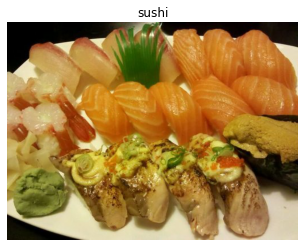

In [7]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

## 2. Preprocessing the data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a Model (baseline?)

In [9]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [10]:
# a baseline simple model

# Create our model 
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') 
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 4. Fit the model

In [11]:

history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 192ms/step - loss: 2.1982 - accuracy: 0.1880 - val_loss: 2.0670 - val_accuracy: 0.2628
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.9681 - accuracy: 0.3049 - val_loss: 1.8446 - val_accuracy: 0.3424
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.7200 - accuracy: 0.4129 - val_loss: 1.8164 - val_accuracy: 0.3636
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 1.3240 - accuracy: 0.5577 - val_loss: 2.0292 - val_accuracy: 0.3252
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.7707 - accuracy: 0.7464 - val_loss: 2.5797 - val_accuracy: 0.3044


## 5. Evaluate the model

In [12]:
# Evaluate on the test data
model_1.evaluate(test_data)

79/79 [==============================] - 12s 153ms/step - loss: 2.5797 - accuracy: 0.3044


[2.579699993133545, 0.3043999969959259]

In [13]:
# Plotting the curves separately to make them more clear

def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()  

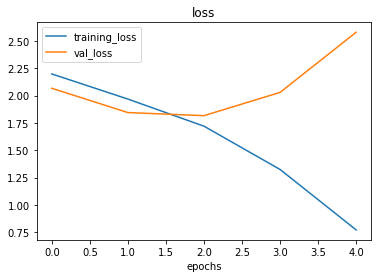

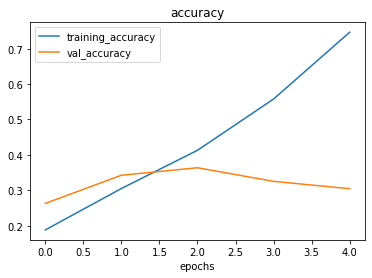

In [14]:
plot_loss_curves(history_1)

## 6. Adjust the model parameters

In [15]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 182ms/step - loss: 2.1153 - accuracy: 0.2443 - val_loss: 2.0376 - val_accuracy: 0.2756
Epoch 2/5
235/235 [==============================] - 42s 181ms/step - loss: 1.7709 - accuracy: 0.3995 - val_loss: 1.9324 - val_accuracy: 0.3168
Epoch 3/5
235/235 [==============================] - 42s 177ms/step - loss: 1.3778 - accuracy: 0.5469 - val_loss: 2.1225 - val_accuracy: 0.3000
Epoch 4/5
235/235 [==============================] - 42s 178ms/step - loss: 0.8904 - accuracy: 0.7209 - val_loss: 2.4446 - val_accuracy: 0.3108
Epoch 5/5
235/235 [==============================] - 41s 177ms/step - loss: 0.4972 - accuracy: 0.8572 - val_loss: 2.9162 - val_accuracy: 0.2760


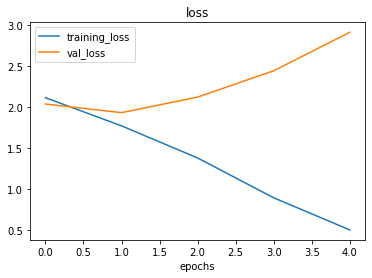

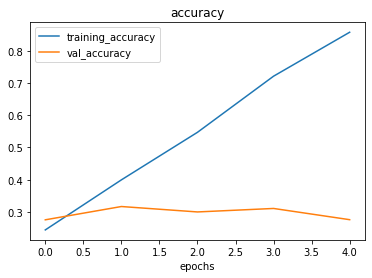

In [16]:
# Check out the loss curves of model_2
plot_loss_curves(history_2)

Here we still have overfitting that is need to be fixed.

What about using augmented data?


In [17]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [18]:
# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_2)

# Compile the cloned model (same setup as used for model_10)
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 456ms/step - loss: 2.1684 - accuracy: 0.2109 - val_loss: 1.9591 - val_accuracy: 0.3104
Epoch 2/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0351 - accuracy: 0.2840 - val_loss: 1.8979 - val_accuracy: 0.3404
Epoch 3/5
235/235 [==============================] - 107s 454ms/step - loss: 1.9875 - accuracy: 0.3064 - val_loss: 1.8123 - val_accuracy: 0.3676
Epoch 4/5
235/235 [==============================] - 106s 452ms/step - loss: 1.9461 - accuracy: 0.3252 - val_loss: 1.8105 - val_accuracy: 0.3756
Epoch 5/5
235/235 [==============================] - 107s 457ms/step - loss: 1.9048 - accuracy: 0.3407 - val_loss: 1.7666 - val_accuracy: 0.3960


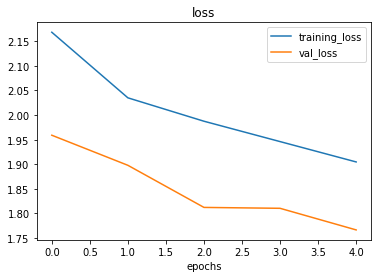

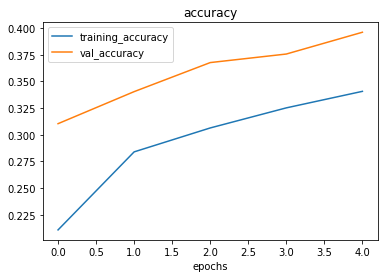

In [19]:
# Check out our model's performance with augmented data
plot_loss_curves(history_3)

## 7. Repeat till satisfied

In [20]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [21]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [25]:
# cReating a function that preprocess the custom data

def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [26]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

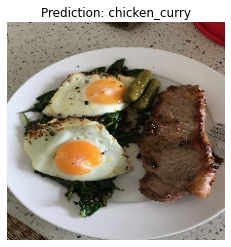

In [29]:
# Make a prediction using model_3
pred_and_plot(model=model_3, 
              filename="03-steak.jpeg", 
              class_names=class_names)

Hmm... it looks like our model got the prediction wrong, how about we try another?

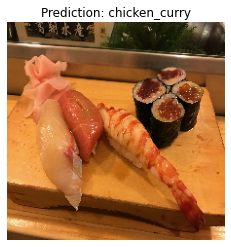

In [30]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)

chicken_curry again? There must be something wrong...

I think it might have to do with our pred_and_plot function.

Let's makes a prediction without using the function and see where it might be going wrong.

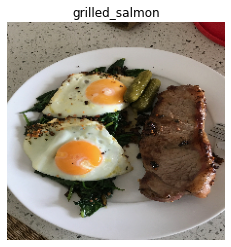

In [32]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_3.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

Much better! There must be something up with our pred_and_plot function.

And I think I know what it is.

The pred_and_plot function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the predict function.

In [33]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

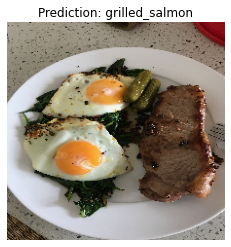

In [35]:
pred_and_plot(model_3, "03-steak.jpeg", class_names)

## Save and Load the model

In [36]:
# Save a model
model_3.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [37]:
# Load in a model and evaluate it
loaded_model_3 = tf.keras.models.load_model("saved_trained_model")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 11s 144ms/step - loss: 1.7666 - accuracy: 0.3960


[1.7665868997573853, 0.3959999978542328]

In [38]:
# Compare our unsaved model's results (same as above)
model_3.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 1.7666 - accuracy: 0.3960


[1.766587257385254, 0.3959999978542328]